# Practical Work 6

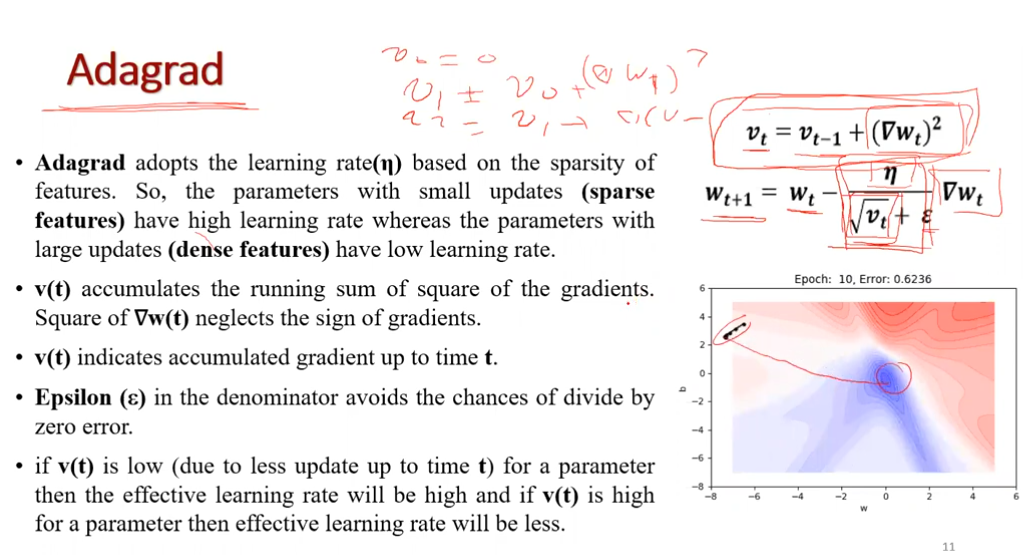

- For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Multivariables) of a set of datapoints.
- We will do a vectorize implementation (Using Matrix vectors operations) which is the more general and effecient form of GD implementation.
- As we did with the single variable we will do step by step implementation then combine all steps togeteher then make a function for the Multivariables LR training using GD.

### Prerequisites:
- You should have seen <b>Day 1 and Day 2 as well as Day 3 Part 1</b> from our course <b><i>Master Numerical Optimization for Machine Learning and Deep Learning in 5 Days</b></i>.
- The course is available for free on our channel <b><i>Artificial Intelligence & Data Science شرح بالعربي</i></b>.
- Course link https://youtube.com/playlist?list=PLJM7jJIw2GC15hvIwN8sBXok__yLMcMxN&feature=shared

### Whatsapp Channel: 
https://whatsapp.com/channel/0029Va0cflnId7nVMfzByO3k

### Import numpy, matplotlib.pyplot

In [100]:
def plot_loss(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.show()
    
def plot_theta_loss(Th,Th_0_1,Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel(Th_0_1,fontsize=14,fontweight='bold')
    plt.ylabel('Loss',fontsize=14,fontweight='bold')
    plt.plot(Th,Losses,'-mo',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    

In [101]:
import numpy as np ,matplotlib.pyplot as plt,seaborn as sns ,plotly.express as px

### Read MultiVarLR.csv file into numpy array 

In [102]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [103]:
m=len(data)

In [104]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

### Define variables X and y. 
### Assign all columns data except the last one to X and last column to y
<b>Notes:</b> 
- We have here 3 independent variables and one dependent variable.
- Make sure <b>y</b> is a column vector to obtain correct matrix vector operations.

In [105]:
X=data[:,0:3]
print(X)
print(X.shape)


[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
(25, 3)


In [106]:
Y=data[:,3].reshape((-1,1))
Y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [107]:
Y.shape
Y=Y.reshape(-1,1)
Y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### Add column of ones to the X data matrix to be X0 variable for theta0 parameters.
- The model has X1,X2, and X3 variables and theta0, theta1, theta3, and theta4 parameters. So, we need X0 for theta0 to have consistent <b>X matrix</b> dimensions.

In [108]:
ones_col= np.ones(  (m, 1))
x=data[:,0:3]
x_new= np.hstack(   (      ones_col , x     )   ) #or

x=data[:,0:3]
x_new=np.concatenate( (ones_col,x) ,axis=1 )   #25*4

x_new

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

### Step 1: Initialize model parameters as 4 by 1 column vector of zeros.

In [109]:
n_1=data.shape[1]
Th=np.zeros((n_1,1))
Th

array([[0.],
       [0.],
       [0.],
       [0.]])

### Step 2: Calculate model outpt y for all data points using matrix vector multiplication.
###  $$h(x) = X\theta$$

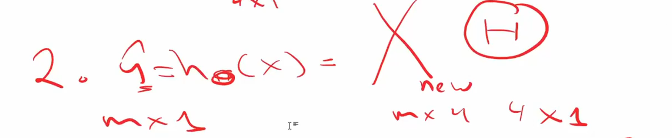

In [110]:
H=x_new@Th    #  25*4   @ 4*1 ==>    25*1
H

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Step 3: Calculate the MSE Cost function.
- You should calculate the error vector first <b>e = h - y</b> then use it for cost function calculation.
- We will also need this error vector in gradient vector calculation.

In [111]:
E=H-Y    #  25*1 -   25*1  ==>25*1 
print(H.shape,Y.shape)
E.shape

(25, 1) (25, 1)


(25, 1)

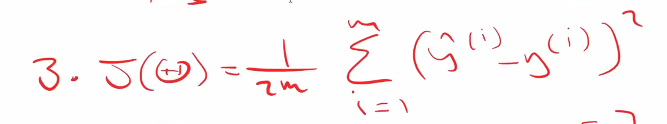

In [112]:
j=np.linalg.norm(E)**2/(2*m)
j

13405.98

### Step 4: Calculate the gradient vector
- In this step we will not calculate each gradient component for each parameter individually.
- We will use the error vector and calculate the gradient vector by multiplying the data matrix transpose with the error vector .
###  $$\nabla =\frac{X^Te}{m}$$

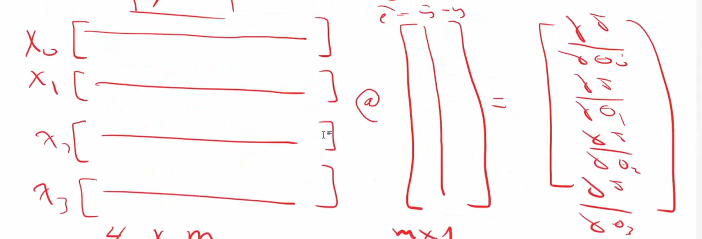

In [113]:
grad=(x_new.T @E )/m    #  4*25 @  25*1 ==>4*1
grad

array([[  -162.04],
       [-13075.8 ],
       [-13147.2 ],
       [-13467.08]])

### Step 5: Check if gradient norm < critical value (stop condition) e.g. 0.1

In [114]:

grad_norm=np.linalg.norm(grad)
print(grad_norm)

22917.545989219703


### Step6: Update the parameters (use 0.00001 learning rate)

In [115]:
e=.000000001
alpha=0.00001
v_prev=np.zeros((4,1))


In [116]:
print(Th)
print(grad)
v_cur= v_prev +(grad**2)
Th=Th-(  (alpha/(np.sqrt(v_cur)+e))*grad)
Th

[[0.]
 [0.]
 [0.]
 [0.]]
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]


array([[1.e-05],
       [1.e-05],
       [1.e-05],
       [1.e-05]])

### Step 7: Combine all the previous steps and iterate untill you reach the critical value of the gradient norm or cost convergence check .
- learning rate = 0.00001.
- Maximum number of iterations = 10000.
- Stop condition grad_norm < 0.1.
- Cost convergence check <b>abs(cost[i] - cost[i-1]) < 0.001 </b>

### In order to plot the learning curves you need to save thetas and cost each iteration.

In [127]:

m=x_new.shape[0] 
n_1=x_new.shape[1]
aplha=0.1
E=0.000000001
max_iter=1500
v_prev=np.zeros((n_1,1))
grad_check=0.1
conv_check=0.001
th=np.zeros((n_1,1))
loss=[]
theats_arr=[]
for i in range(max_iter):
    print(f"****************** Iteration  {i} ******************** \n")
    theats_arr.append(th)
    h=x_new@th                                  #  25*4   @ 4*1   ==>    25*1
    print(f" h(x) = \n{h}")
    e=h-Y                                   #  25*1 -   25*1  ==>25*1 
    print(f"E(x) = \n{e}")
    j=np.linalg.norm(e)**2/(2*m)  
    print(f"J = \n{j}")
    loss.append(j)
    grad=(x_new.T @e )/m                        #  4*25 @  25*1 ==>4*1
    print(f"grad = {grad}")
    grad_norm=np.linalg.norm(grad)
    print(f"grad_norm = \n{grad_norm}")
    if grad_norm<grad_check:
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break 
    if i>0 and  np.absolute(loss[i-1]-loss[i]) < conv_check :
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break
    v_prev= v_prev +(grad**2)
    th=th - (aplha/(np.sqrt(v_prev)+E)) *grad
    print(f"new_theats = \n{th}")
    

    

****************** Iteration  0 ******************** 

 h(x) = 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
E(x) = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.1]
 [0.1]
 [0.1]
 [0.1]]
****************** Iteration  1 ******************** 

 h(x) = 
[[22.9]
 [27.5]
 [27.1]
 [29.5]
 [21. ]
 [15.5]
 [22.1]
 [16.4]
 [25.7]
 [23.8]
 [21.3]
 [21. ]
 [28. ]
 [23.3]
 [22.2]
 [27.9]
 [22.2]
 [26.5]
 [26.7]
 [23.9]
 [25.9]
 [25.8]
 [24.7]
 [23.1]
 [28.5]]
E(x) = 
[[-129.1]
 [-157.5]
 [-152.9]
 [-166.5]
 [-121. ]
 [ -85.5]
 [-126.9]
 [ -98.6]
 [-149.3]
 [-140.2]
 [-119.7]
 [-120. ]
 [-156. ]

### Predict y values using the LR equation 
- Now we will use the obtained obtimum parameters <b>thetas</b> to make predition using the equation: 
###  $$h(x) = X\theta$$

In [129]:
h=x_new@th
h

array([[153.9043463 ],
       [184.83189941],
       [182.13653993],
       [198.27444643],
       [141.14087778],
       [104.18849063],
       [148.54563923],
       [110.24361464],
       [172.74595965],
       [159.99285977],
       [143.16412859],
       [141.15602277],
       [188.1777243 ],
       [156.58047321],
       [149.22045795],
       [187.52657013],
       [149.18268158],
       [178.12252175],
       [179.43778163],
       [160.62034939],
       [174.08656096],
       [173.4126032 ],
       [166.01752161],
       [155.23066358],
       [191.54755812]])

### Use R Squared metrics to evaluate LR equation output
- Can be found in <b>sklearn.metrics</b>

https://www.youtube.com/watch?v=KccCy0hu-dM

In [130]:
from sklearn.metrics import r2_score

In [131]:
r2_score(Y,h) 

0.9783243529864963

### Plot loss vs. iterations

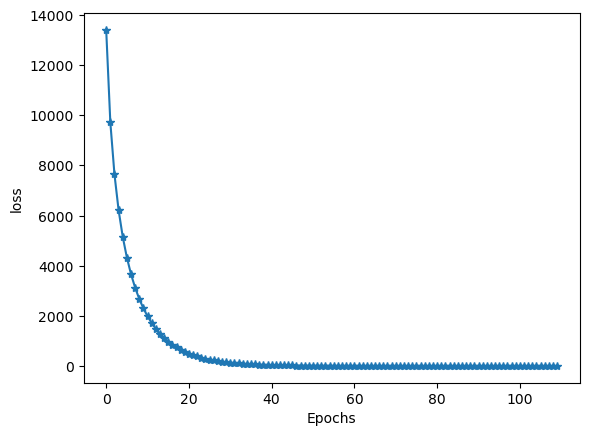

In [132]:
plt.figure()
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()



### Plot loss vs. each theta

In [133]:
array=np.array(theats_arr)
print (array.shape)                                  ##########important 
array=array.reshape((len(theats_arr),n_1))
print (array.shape)                                  
print (array)


(110, 4, 1)
(110, 4)
[[0.         0.         0.         0.        ]
 [0.1        0.1        0.1        0.1       ]
 [0.16482102 0.16482014 0.16481985 0.16482643]
 [0.214655   0.21465285 0.21465214 0.21466816]
 [0.25564654 0.25564287 0.25564165 0.25566905]
 [0.29061118 0.29060577 0.29060397 0.29064435]
 [0.32111529 0.32110796 0.32110552 0.32116025]
 [0.34813758 0.34812816 0.34812502 0.34819538]
 [0.37233923 0.37232755 0.37232367 0.37241085]
 [0.39419277 0.39417869 0.39417401 0.39427914]
 [0.41405071 0.41403408 0.41402855 0.41415271]
 [0.43218497 0.43216566 0.43215924 0.43230347]
 [0.44881114 0.44878901 0.44878165 0.44894695]
 [0.46410399 0.4640789  0.46407056 0.46425791]
 [0.47820787 0.47817971 0.47817035 0.47838069]
 [0.49124399 0.49121264 0.49120221 0.49143644]
 [0.50331547 0.5032808  0.50326927 0.50352827]
 [0.51451109 0.51447299 0.51446032 0.51474495]
 [0.52490811 0.52486648 0.52485263 0.52516371]
 [0.53457434 0.53452906 0.53451401 0.53485232]
 [0.54356976 0.54352073 0.54350443 0.54

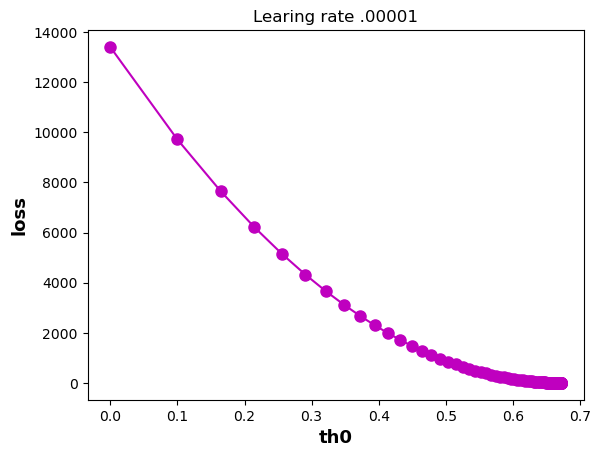

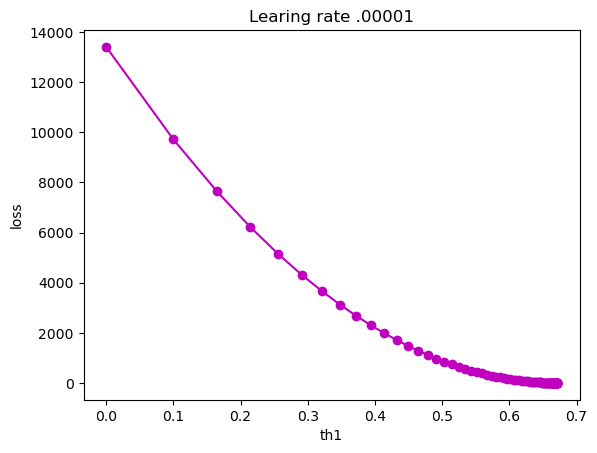

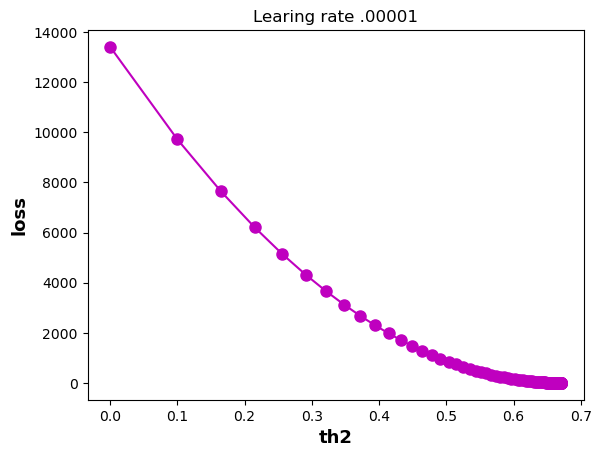

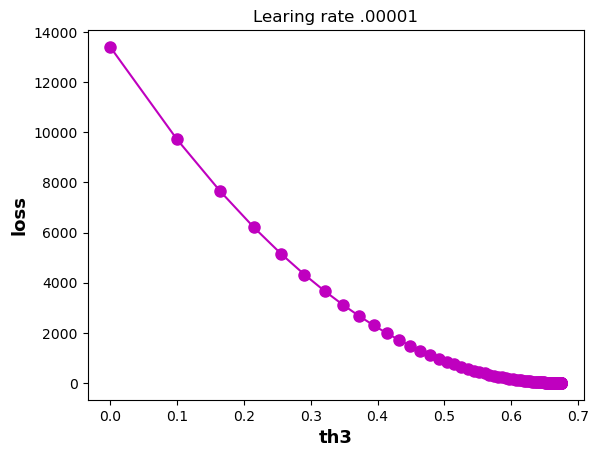

In [134]:
plt.figure()
plt.plot(array[:,0],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th0',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')
plt.figure()
plt.plot(array[:,1],loss,'mo-',)
plt.title("Learing rate .00001")
plt.xlabel('th1')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,2],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th2',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')
plt.figure()
plt.plot(array[:,3],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th3',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')

plt.show()

- Use <b>learning rate = 0.0001</b> and see the difference in learning curves and <b>r2_score</b>.
- You can also try larger learning rate i.e. <b>0.001</b> and see how the optimizer diverges and <b>r2_score</b>.

In [162]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

y=data[:,3].reshape(-1,1)
x=data[:,0:3]
x_new= np.hstack(                 (   np.ones(     (x.shape[0], 1)   )  , x     )   )

m=x_new.shape[0] 
n_1=x_new.shape[1]
aplha=0.9
E=0.000000001
max_iter=1500
v_prev=np.zeros((n_1,1))
grad_check=0.1
conv_check=0.001
th=np.zeros((n_1,1))
loss=[]
theats_arr=[]
for i in range(max_iter):
    print(f"****************** Iteration  {i} ******************** \n")
    theats_arr.append(th)
    h=x_new@th                                  #  25*4   @ 4*1   ==>    25*1
    print(f" h(x) = \n{h}")
    e=h-Y                                   #  25*1 -   25*1  ==>25*1 
    print(f"E(x) = \n{e}")
    j=np.linalg.norm(e)**2/(2*m)  
    print(f"J = \n{j}")
    loss.append(j)
    grad=(x_new.T @e )/m                        #  4*25 @  25*1 ==>4*1
    print(f"grad = {grad}")
    grad_norm=np.linalg.norm(grad)
    print(f"grad_norm = \n{grad_norm}")
    if grad_norm<grad_check:
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break 
    if i>0 and  np.absolute(loss[i-1]-loss[i]) < conv_check :
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break
    v_prev= v_prev +(grad**2)
    th=th - (aplha/(np.sqrt(v_prev)+E)) *grad
    print(f"new_theats = \n{th}")
    

    
    

    

****************** Iteration  0 ******************** 

 h(x) = 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
E(x) = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.9]
 [0.9]
 [0.9]
 [0.9]]
****************** Iteration  1 ******************** 

 h(x) = 
[[206.1]
 [247.5]
 [243.9]
 [265.5]
 [189. ]
 [139.5]
 [198.9]
 [147.6]
 [231.3]
 [214.2]
 [191.7]
 [189. ]
 [252. ]
 [209.7]
 [199.8]
 [251.1]
 [199.8]
 [238.5]
 [240.3]
 [215.1]
 [233.1]
 [232.2]
 [222.3]
 [207.9]
 [256.5]]
E(x) = 
[[54.1]
 [62.5]
 [63.9]
 [69.5]
 [47. ]
 [38.5]
 [49.9]
 [32.6]
 [56.3]
 [50.2]
 [50.7]
 [48. ]
 [68. ]


In [163]:
h=x_new@theats_arr[-1]
h

array([[153.08925187],
       [184.93066989],
       [181.62908603],
       [198.57331151],
       [140.7354313 ],
       [105.23831857],
       [149.66287573],
       [112.31043095],
       [174.08133387],
       [163.14645494],
       [143.68616765],
       [142.44364013],
       [186.82525131],
       [154.29750924],
       [150.59054176],
       [188.32810418],
       [146.30803836],
       [179.79273736],
       [177.8465341 ],
       [159.21308317],
       [175.28624369],
       [174.23876461],
       [166.82611225],
       [152.4661398 ],
       [191.10242641]])

In [159]:
r2_score(Y,h)

0.9873276637140213

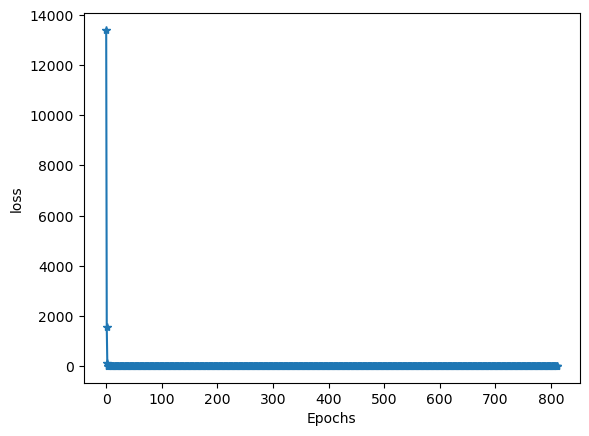

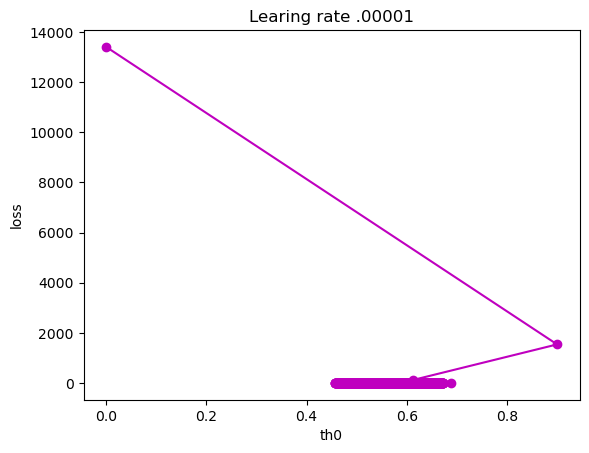

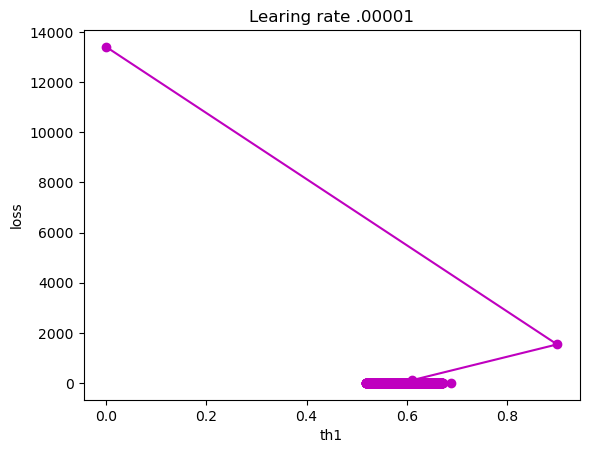

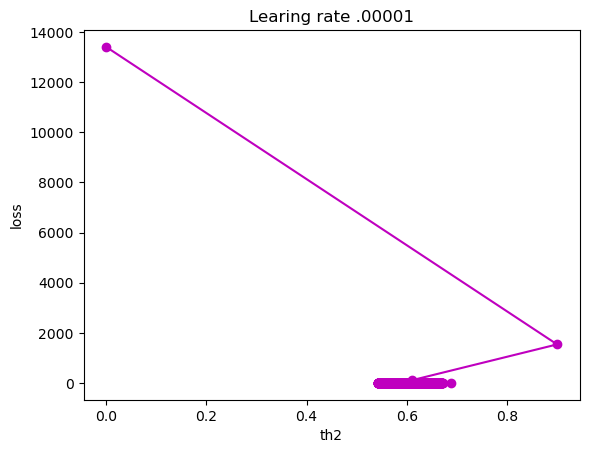

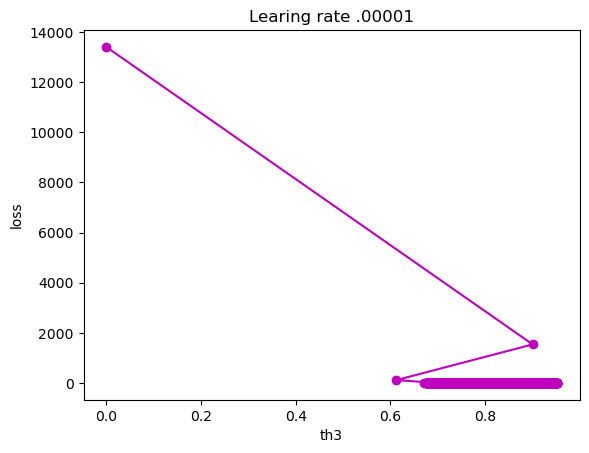

In [164]:
plt.figure()
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

array=np.array(theats_arr)
plt.figure()
plt.plot(array[:,0],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th0')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,1],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th1')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,2],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th2')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,3],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th3')
plt.ylabel('loss')

plt.show()

In [169]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

y=data[:,3].reshape(-1,1)
x=data[:,0:3]
x_new= np.hstack(                 (   np.ones(     (x.shape[0], 1)   )  , x     )   )

m=x_new.shape[0] 
n_1=x_new.shape[1]
aplha=0.999
E=0.000000001
max_iter=1500
v_prev=np.zeros((n_1,1))
grad_check=0.1
conv_check=0.001
th=np.zeros((n_1,1))
loss=[]
theats_arr=[]
for i in range(max_iter):
    print(f"****************** Iteration  {i} ******************** \n")
    theats_arr.append(th)
    h=x_new@th                                  #  25*4   @ 4*1   ==>    25*1
    print(f" h(x) = \n{h}")
    e=h-Y                                   #  25*1 -   25*1  ==>25*1 
    print(f"E(x) = \n{e}")
    j=np.linalg.norm(e)**2/(2*m)  
    print(f"J = \n{j}")
    loss.append(j)
    grad=(x_new.T @e )/m                        #  4*25 @  25*1 ==>4*1
    print(f"grad = {grad}")
    grad_norm=np.linalg.norm(grad)
    print(f"grad_norm = \n{grad_norm}")
    if grad_norm<grad_check:
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break 
    if i>0 and  np.absolute(loss[i-1]-loss[i]) < conv_check :
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break
    v_prev= v_prev +(grad**2)
    th=th - (aplha/(np.sqrt(v_prev)+E)) *grad
    print(f"new_theats = \n{th}")
    

    
    

    

****************** Iteration  0 ******************** 

 h(x) = 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
E(x) = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.999]
 [0.999]
 [0.999]
 [0.999]]
****************** Iteration  1 ******************** 

 h(x) = 
[[228.771]
 [274.725]
 [270.729]
 [294.705]
 [209.79 ]
 [154.845]
 [220.779]
 [163.836]
 [256.743]
 [237.762]
 [212.787]
 [209.79 ]
 [279.72 ]
 [232.767]
 [221.778]
 [278.721]
 [221.778]
 [264.735]
 [266.733]
 [238.761]
 [258.741]
 [257.742]
 [246.753]
 [230.769]
 [284.715]]
E(x) = 
[[76.771]
 [89.725]
 [90.729]
 [98.705]
 [67.7

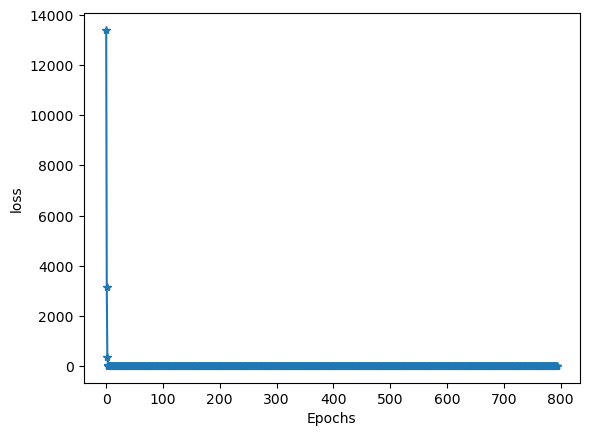

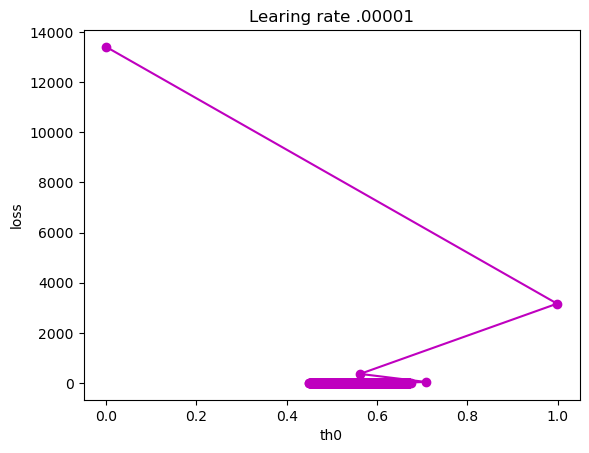

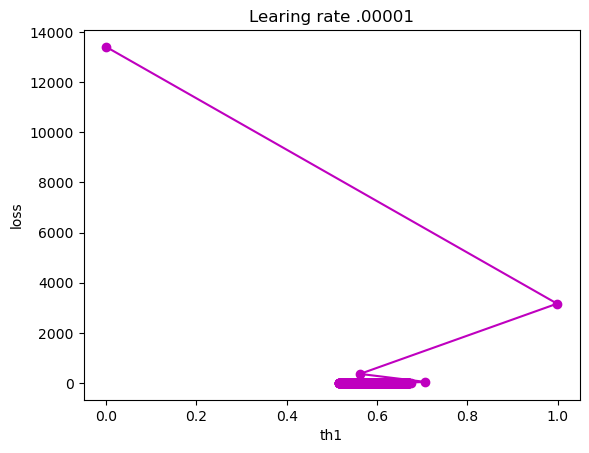

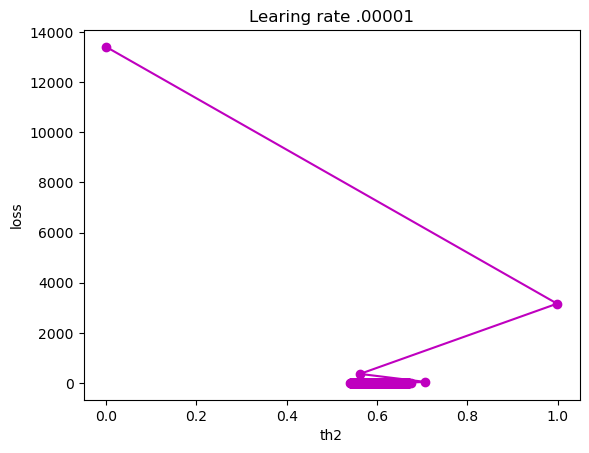

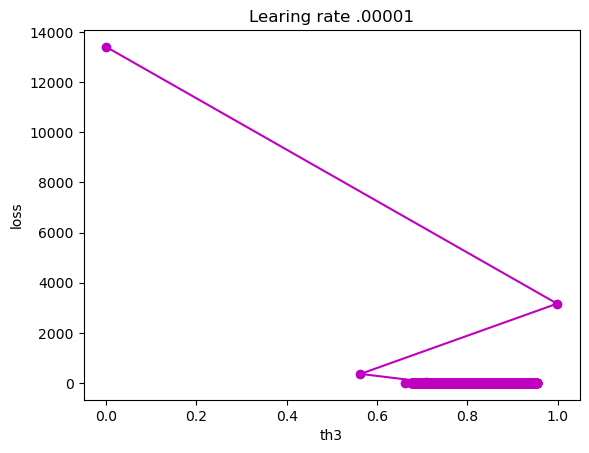

In [170]:
plt.figure()
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

array=np.array(theats_arr)
plt.figure()
plt.plot(array[:,0],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th0')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,1],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th1')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,2],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th2')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,3],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th3')
plt.ylabel('loss')

plt.show()

## Optional Part: Make all as funtions:
### You can modify the implementation to be a function taking all hyperparameters and return all needed outputs.
### You can also make your plotting using functions taking the outputs and return the learning curves.
### This will make your life easy when you want to try different values of hyperparametrs.

#### Use your previous code and create a function to perform GD for Muli-variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations, stop conditions values.
#### The function should return the following:
##### All Theta values till converge, and equivellant Losses.

In [177]:

    
def DG_momuntal_Muli_variable_linear_regression(X,Y,alpha=.1,max_iter=1000,grad_check=.001,conv_check=.001):
    
    m=X.shape[0]
    onesArray=   np.ones(  (m, 1)   )
    X= np.hstack(  ( np.ones(  (m, 1)   )  , X    )  )
    n_1=X.shape[1]
    th=np.zeros((n_1,1))
    v_prev=np.zeros((n_1,1))
    loss=[]
    theats_arr=[]
    e=.000000001
    for i in range(max_iter):
        print(f"****************** Iteration  {i} ******************** \n")
        theats_arr.append(th)
        h=X@th                                  #  25*4   @ 4*1   ==>    25*1
        e=h-Y                                   #  25*1 -   25*1  ==>25*1 
        print(f"Erorr = \n{e}")
        j=np.linalg.norm(e)**2/(2*m)
        print(f"J = \n{j}")
        loss.append(j)
        grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
        print(f"grad = {grad}")
        grad_norm=np.linalg.norm(grad)
        print(f"grad_norm = \n{grad_norm}")
        if grad_norm<grad_check:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i+1} epochs \n ")
            print(f"theta_Opt :\n{th}\n")
            print(f"Error Vector: :\n{e}\n")
            print(f"Cost  :\n{j}\n")
            print(f" y_predict:\n{h}\n")
            print(f" y_actual:\n{Y}\n")
            break 
        if i>0 and  abs(loss[i-1]-loss[i]) < conv_check :
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i+1} epochs \n ")
            print(f"theta_Opt :\n{th}\n")
            print(f"Error Vector: :\n{e}\n")
            print(f"Cost  :\n{j}\n")
            print(f" y_predict:\n{h}\n")
            print(f" y_actual:\n{Y}\n")
            break
        v_prev=v_prev+ (grad**2)
        th=th-((alpha/(np.sqrt(v_prev)+E))*grad)
        print(f"new_theats = \n{th}")
    return theats_arr,loss
        
T,loss=DG_momuntal_Muli_variable_linear_regression(x,Y,.99,1000,.01,.001)
    

****************** Iteration  0 ******************** 

Erorr = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.99]
 [0.99]
 [0.99]
 [0.99]]
****************** Iteration  1 ******************** 

Erorr = 
[[74.71]
 [87.25]
 [88.29]
 [96.05]
 [65.9 ]
 [52.45]
 [69.79]
 [47.36]
 [79.43]
 [71.62]
 [69.87]
 [66.9 ]
 [93.2 ]
 [78.67]
 [71.78]
 [84.21]
 [72.78]
 [79.35]
 [87.33]
 [77.61]
 [79.41]
 [80.42]
 [69.53]
 [79.69]
 [90.15]]
J = 
2993.312657998129
grad = [[  76.55  ]
 [6179.7792]
 [6214.3884]
 [6345.7108]]
grad_norm = 
10820.452837403363
new_theats = 
[[0.56712324]
 [0.56697856]
 [0.56693044]
 [0.56801121]]
****************** Iteration  2 ******************** 

Erorr = 
[[-22.08816632]
 

In [178]:
def calc_r2(Y,t):
    h=X@t[-1]
    return r2_score(Y,h)

t=np.array(T)
#print(X)
t=t.reshape((-1,4))
x=calc_r2(Y,t)
print(x)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

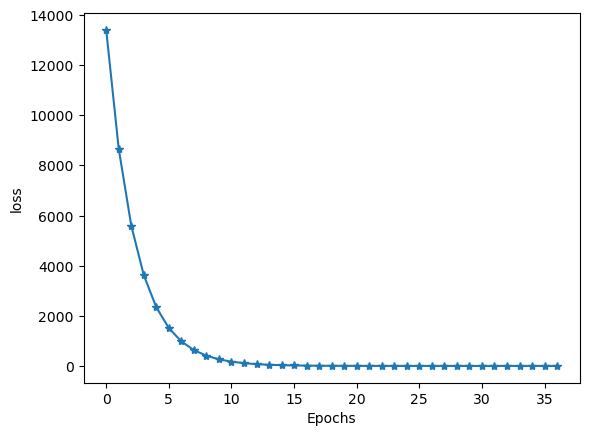

In [74]:
def plot_loss(loss):
    plt.figure()
    plt.plot(loss,'*-')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.show()

plot_loss(loss)
    

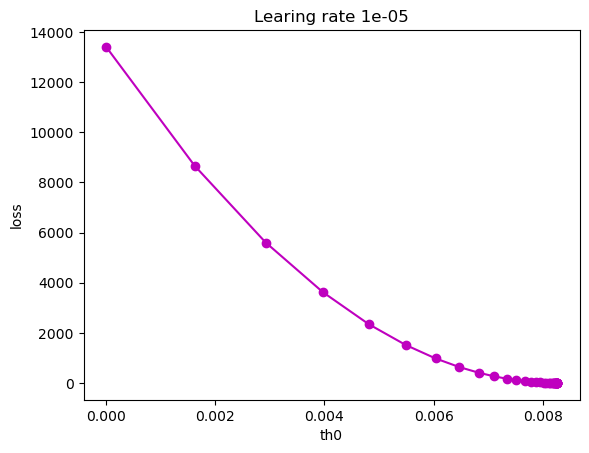

In [75]:
def plot_theta_loss(theats_arr,loss,alpha,theata):
    array=np.array(theats_arr)
    plt.figure()
    plt.plot(array[:,theata],loss,'mo-')
    plt.title(f"Learing rate {alpha}")
    plt.xlabel(f"th{theata}")
    plt.ylabel('loss')
    plt.show()
    
plot_theta_loss(T,loss,0.00001,0)

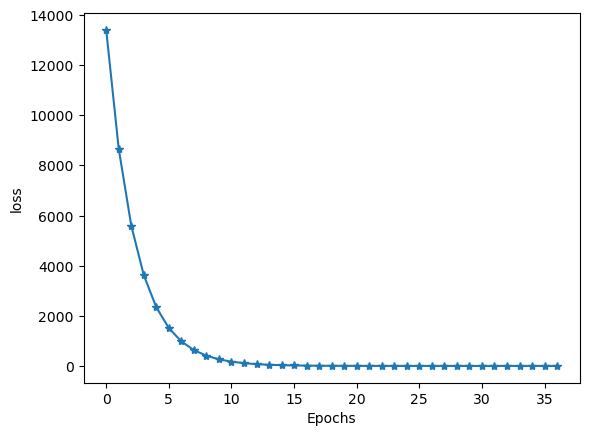

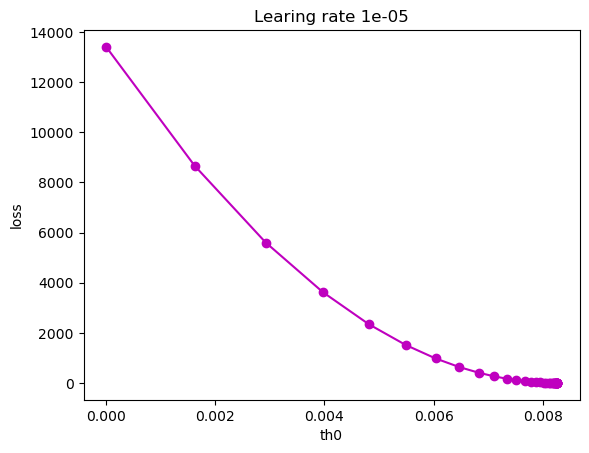

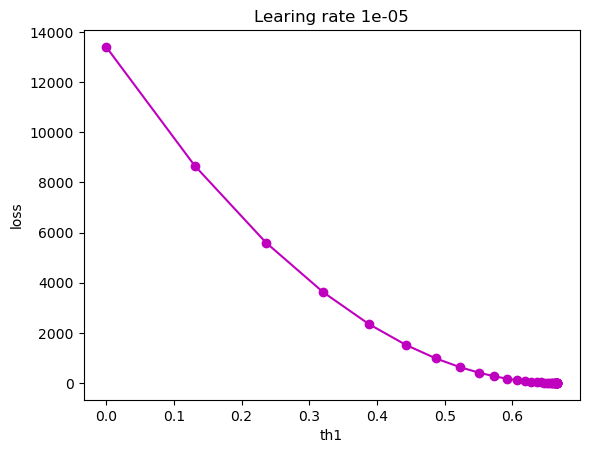

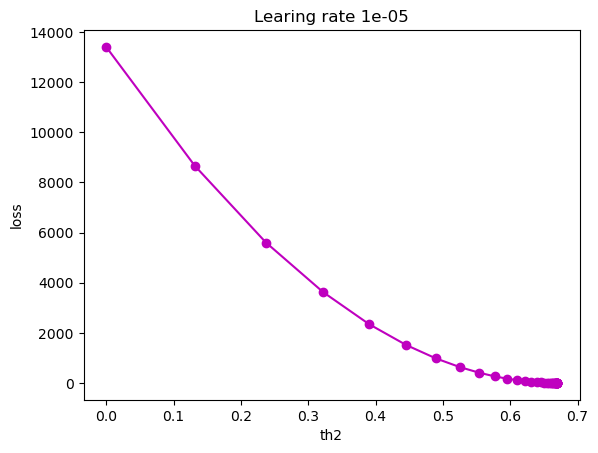

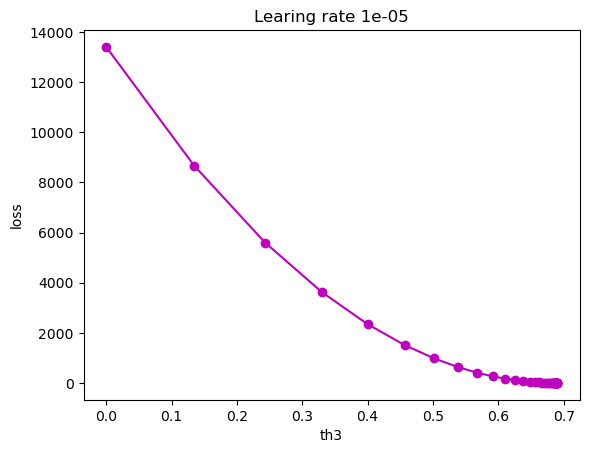

In [76]:
plot_loss(loss,)
ths_arr = np.array(T).reshape((-1,4))
plot_theta_loss(T,loss,0.00001,0)
plot_theta_loss(T,loss,0.00001,1)
plot_theta_loss(T,loss,0.00001,2)
plot_theta_loss(T,loss,0.00001,3)

